<center><font size="+4">Introduction to Programming in Python 2019/2020</font></center>
<center><font size="+2">Sant'Anna School of Advanced Studies, Pisa, Italy</font></center><br/>

<center><font size="+2">Course responsible</font></center>
<center><font size="+2">Andrea Vandin a.vandin@santannapisa.it</font></center>

<center><font size="+2">Co-lecturer </font></center>
<center><font size="+2">Daniele Licari d.licari@santannapisa.it</font></center>

---

<center><font size="+4">Module 6: Modules,</font></center>
<center><font size="+4"> Exceptions & OO Programming</font></center>
<center><font size="+2"> With applications to</font></center>
<center><font size="+2"> Financial Betting Markets and SIR models</font></center>

In [ ]:
from IPython.display import Image, display
img=Image(filename='images/tentativeLecturePlan.png',width=800)
display(img)

# Importing Modules

As discussed several times, it is very important to structure your programs
* A Python program might consist of (code from) multiple files
* Each file is seen as a separate _module_ that can be imported in the current one

## Import Python modules

Does this ring a bell to you?
* We already imported many _predefined python modules_ in the previous classes.

For example...

In [ ]:
import csv
import matplotlib.pyplot as plt

In [ ]:
from IPython.display import Image, display
#img=Image(filename='images/tentativeLecturePlan.png',width=300)
img=Image(filename='images/tentativeLecturePlan.png',width=300)
display(img)

What is the role of the `from` keyword?
* It allows you to specify functions or types of interest that you want to import
* You will import only them
* Also, you will not need to specify the name of the module everytime you use the imported functions/types

In [ ]:
import IPython.display
img=IPython.display.Image(filename='images/tentativeLecturePlan.png',width=300)
IPython.display.display(img)

## Import Python modules from local Python files (created by you)

Importing Python code defined in Python files is rather simple
* I created a very simple Python file (i.e., a file with extension .py)
  * Do not confuse a Python file (.py) with a jupyter notebook (.ipynb)

The file is [test_import_py.py](test_import_py.py)
* We just need to write the following

In [ ]:
import test_import_py

After this, we can use any type or function defined in the file

In [ ]:
test_import_py.my_function()

If you don't want to specify the name of the file everytime you use the function
* Then explicitly import the function!

In [ ]:
from test_import_py import my_function

In [ ]:
my_function()

What if the Python file is not in the folder of the current notebook?
* Just specify the relative path of Python file using '.' as separator

In [ ]:
import other.test_import_py_Copy1
other.test_import_py_Copy1.my_function2()

## Import Jupyter Notebooks

__Jupyter notebooks are not python files__
* They are collections of textual (markdown) and code (Python) cells

Importing jupyter notebooks requires some hacks.
* [There are several options to do this](https://stackoverflow.com/questions/20186344/ipynb-import-another-ipynb-file)

A very simple and way is the following
  * (but remember to save the _other_ notebook, otherwise you will load the last saved version :D)

In [ ]:
%run test_import_nb.ipynb

Now you can just invoke any function defined in the _other_ notebook

In [ ]:
my_function_nb()

What if the other notebook is not in the same folder of the current notebook?
* Just specify the relative path of the other notebook

In [ ]:
%run other/test_import_nb_Copy1.ipynb

In [ ]:
my_function_nb2()

# Exceptions and exception handling

There are two types of _errors_ in programs
* Compile-time errors: detected while you write the program
  * The Python interpreter complains if you wrote a _syntactically wrong_ Python program
* Run-time erros: detected while the program is executed
  * Your program is syntactically correct, but there might be unexpected problems, e.g. 
    * if you try dividing by zero
    * if you try accessing an index in a list/str beyond its actual size

In [ ]:
def divide(n,d):
    res = n/d
    return res 

print(divide(4,2))
#print(divide(4,0))#ERROR!

In [ ]:
my_str = "ciao"
print(my_str[3])
#print(my_str[4])#ERROR!

All modern programming languages provide a machinery to _catch_, handle and recover from such unexcepted __exceptional__ cases
* [__Exception handling__](https://docs.python.org/3/tutorial/errors.html)

Exception handling is thus a way to make your program robust to unexpected inputs

## Catching Exceptions

### Try and except

In [ ]:
try:
    #print(divide(4,0))#HANDLED ERROR!
    print(divide(4,'ciao'))#HANDLED ERROR!
except ZeroDivisionError:
    print('You tried dividing by zero')
except TypeError as e:
    print('The function divide requires two numeric data types')
    print('This is the thrown exception:',e)

In [ ]:
whattodo = 'continue'
i=1
while whattodo != 'stop':
    try:
        print('Give me numerator and denominator, in two lines')
        n = int(input())
        d = int(input())
        print(divide(n,d))
        whattodo = input("Write 'stop' if you want to terminate")
    except ZeroDivisionError:
        print('You tried dividing by zero. Try again')
    except ValueError:
        print('The function divide requires two int. Try again')
    print('Iteration',i,'completed')
    print()

Did you notice what happens after an exception happen in line `print(divide(n,d))`?
1. We jump to the correct `except` branch
  * The one for the type of the thrown exception
  * We skip any instruction after the one raising the exection
    * We don't get asked whether we want to stop!
2. We execute the body of the `except`
3. We continue executing the next instruction after the `try`-`except` statement

### The finally block

The try-catch statements allows for a `finally` clause
* Code that will be always executed
  * If an exception has been thrown
  * If no exception has been thrown

With the following change we are guaranteed that we will always be asked wheter we want to continue or not
* Even if we remove the except

In [ ]:
whattodo = 'continue'
i=1
while whattodo != 'stop':
    try:
        print('Give me numerator and denominator, in two lines')
        n = int(input())
        d = int(input())
        print(divide(n,d))
    except ZeroDivisionError:
         print('You tried dividing by zero. Try again')
    except ValueError:
        print('The function divide requires two int. Try again')
    finally:
        whattodo = input("Write 'stop' if you want to terminate")
    print('Iteration',i,'completed')
    print()    

The finally clause is particularly useful when using external resources that have to be dealt with no matter what
* The classic example is a file we are reading/writing

In [ ]:
#Open a file to write in it (appending to previous text (a))
file = open('data.txt', 'a')
try:
    for i in range(2):
        print('Give me numerator and denominator, in two lines')
        n = int(input())
        d = int(input())
        res=divide(n,d)
        file.write(str(res))
        file.write('\n')
finally:
    print('Closing the file')
    file.close()
print('This code will not be executed in case of exception, But we have the guarantee to have closed the file.')

#file.write("I can't write on a closed file") #ERROR

### The else block

We can also use an `else` block which is executed if no exeption is thrown

In [ ]:
try:
    #4/0
    4/2
except ZeroDivisionError:
    print('Division by zero')
else:
    print('No exception')
finally:
    print('No matter what, this block will be executed as last')

## Raising exceptions

The exception handling mechanism also allows us to throw exceptions
* This is useful in many occasions
* But don't abuse of this feature!
  * Exceptions are for exceptional cases
  * Exaggerating with their use will make your program
    * Less efficient
    * More obfuscated, and therefore less manutenable

In [ ]:
try:
    raise ZeroDivisionError 
except ZeroDivisionError:
    print('The exception has been thrown')

## Exception propagation

If an exception is thrown within a function which does not handle it
* It will be propagated to the caller of the function. It this does not handle it
  * It will be propagated to the caller of the caller of the function 
    * And so on, until we reach the top level of execution

In [ ]:
from IPython.display import Image, display
img=Image(filename='images/exceptionPropagation.png',width=800)
display(img)

In [ ]:
def func1():
    try:
        func2()
    except ZeroDivisionError:
        print('In func1 I detected a ZeroDivisionError exception')
        
def func2():
    raise ZeroDivisionError
        

try:
    func1()
except ZeroDivisionError:
    print('In the top-level I detected a ZeroDivisionError exception')

In [ ]:
def func1():
    try:
        func2()
    finally:
        print('Finally of func1')
        
def func2():
    raise ZeroDivisionError
        

try:
    func1()
finally:
    print('Finally of top-level')

Image and example by Prof. Mirco Tribastone, IMT School for Advanced Studies Lucca, Italy

> The [exception handling machinery of Python](https://docs.python.org/3/tutorial/errors.html) is actually richer than this
> * But in this course we will not investigate this aspect any further

# Object-oriented Programming

In the previous class we discussed how to modularize a program into _functions_
* Self-contained units of login with input/output
* Enabling _procedural programming_

In this part of the class we are 
* __bringing modularization to the next level__
* showing how programs can can be further modularized using OOP


Object-oriented Programming is a programming paradigm 
* which allows to transform the problem at hand into a set of interacting objects (or agents)
  * therefore much easier for us to visualize and reason about
* which naturally leads to modularized software
* extremely popular in industry
  * because _it is easier to program using objects_
    * therefore developers are much more productive

## Classes

Before talking about objects we need to talk about classes
* Intuitively, a class defines a new type
* Every instance of such a type is an object
  * A class is the type of an object
  * A class specifies the _structure_ of every object of such class

A class `C` specifies
* The type of data that every object of class `C` will contain
* A numer of functions, or _methods_ that can be used on objects of class `C` to access and modify such data

In [ ]:
class Individual:
    current_year = 2020
    
    def __init__(self,name,birth_year,favourite_sport='None'):
        self.name=name
        self.birth_year=birth_year
        self.favourite_sport=favourite_sport
        
    def getName(self):
        return self.name
    
    def setName(self,new_name):
        if not new_name.isalpha():
            print(new_name,'is not admissible')
        else:
            self.name=new_name
    
    def getAge(self):
        return Individual.current_year - self.birth_year
    
    def getSport(self):
        return self.favourite_sport
    
    def setSport(self,new_favourite_sport):
        self.favourite_sport=new_favourite_sport
    
    def print(self):
        msg = self.getName()+', born in '+str(self.birth_year)+','
        if(self.favourite_sport == 'None'):
            print(msg,'does not like sport')
        else:
            print(msg,'likes',self.getSport())

The class above has 
* __Name__ `Individual`
  * We can use it to create objects representing people
* __7 methods__, where
  * The first argument of each method refers to the _current object_, the object on which it has been invoked
    * By convention, we name it `self`
  * We invoke a method `m` on an object `o` by using the _dot notation_ `o.m()`
    * `andrea.print()`
    * `andrea.setJob('SSSA')`
  * `__init__` is the constructor of the class. It is executed every time we create a new object
    * `andrea = Individual('Andrea',1984,'DTU')`
* __3 attributes__ attached to objects
  * The `name` of the individual
  * The `birth_year` of the individual
  * The `job_place` of the individual if any, or initialized to `'Unemployed'` otherwise
  * __NOTE: every object has its own value for these attributes__
* __1 attribute__ attached to the class
  * This is a sort of _global attribute__ whose value is shared by all objects
  * __NOTE: all objects share the same value for this attribute__

In [ ]:
help(Individual)

## Objects

In [ ]:
Now we can use the defined class `Individual` to create instances of `Individual`, that is objects of such class

In [ ]:
ambra = Individual('Ambra', 1984,"Universita' di Pisa")
print(type(ambra))
ambra.print()

andrea = Individual('Andrea',1984)
andrea.print()

andrea.setSport('Rugby')
andrea.print()

Individual.current_year=2020
print("Andrea is",andrea.getAge())
print("Ambra is",ambra.getAge())
Individual.current_year=2010
print("Andrea is",andrea.getAge())
print("Ambra is",ambra.getAge())

Beware! A __not nice feature__ of Python is that it cannot actually _hide_ attributes
* A feature common of most of OO languages
* Gives you guarantee of modularization

In [ ]:
ambra.setName('Ambra')

#No problems here
print(ambra.getName())
print(ambra.name+"\n")

#But what about here? You can't guarantee that the name is admissible
ambra.setName('_wrongName')
print('The name is',ambra.getName()+"\n")

ambra.name = '_wrongName'
print('The name is',ambra.getName())

Beware! A __not nice feature__ of Python is that attributes can be attached to objects on-the-fly

In [ ]:
andrea.surname = 'Vandin'
print(andrea.surname)

## Inheritance

A nice feature of OOP is that we can _specialize_ existing classes by _extending_ them into more specific versions
* In the _child class_ (or __subclass__) we can reuse all unchanged code and methods from the _father class_ (or __superclass__)
* We only need to modify or add what changes
    * Redefined methods are known as __overridden methods__ 

In [ ]:
class Student(Individual):
    def __init__(self,name,birth_year,student_id,university,favourite_sport='None'):
        self.name=name
        self.birth_year=birth_year
        self.favourite_sport=favourite_sport
        self.university=university
        self.student_id=student_id
    
    def getUniversity(self):
        return self.university
    
    def getStudentId(self):
        return self.student_id
    
    def print(self):
        msg = self.getName() + ', born in ' + str(self.birth_year) + ', studies at ' + self.getUniversity() + ' with id ' +str(self.getStudentId())
        if(self.favourite_sport!='None'):
            msg = msg + ". "+self.getName()+" loves "+self.getSport()
        print(msg)

In [ ]:
marco = Student('Marco',1984,123,'SSSA')
marco.print()

marco.setSport('Rubgy')
marco.print()

marta = Student('Marta',1984,124,'SSSA','Tennis')
marta.print()

The nice thing, is that we can treat individuals and students _in very similar fashion without needing to distinguish among the different types

In [ ]:
class University:
    def __init__(self,name):
        self.name=name
        self.members=[]

    def addMember(self,individual):
        self.members.append(individual)
    
    def print(self):
        print(self.name + ' has',len(self.members),'members:')
        for m in self.members:
            #We don't know if we are invoking Individual.print or Student.print
            m.print()

In [ ]:
sssa = University('SSSA')
sssa.addMember(andrea)

sssa.addMember(marco)
sssa.addMember(marta)

sssa.print()

> The [object-oriented machinery of Python](https://docs.python.org/3/tutorial/classes.html) is actually richer than this
> * But in this course we will not investigate this aspect any further

# A simple example of repeated betting markets (a very simple financial market)

We are now going to implement in Python using OOP a model of a simple _repeated betting market considered in:
* [Kets, W et al, Betting Strategies, Market Selection, and the Wisdom of Crowds, 2014](https://www.aaai.org/ocs/index.php/AAAI/AAAI14/paper/viewFile/8387/8494)
* [Bottazzi G., Giachini D., Far from the madding crowd: collective wisdom in prediction markets, 2019](https://www.tandfonline.com/doi/abs/10.1080/14697688.2019.1622285)

__I thank Daniele Giachini for the great help in preparing this section__

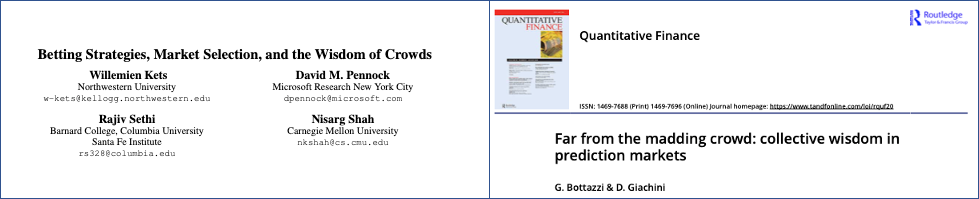

In [7]:
from IPython.display import Image, display
img=Image(filename='images/bettingMarket.png',width=1000)
display(img)

We are going to model a market with 2 agents which place bets in several iterations
* __Event__
  * We observe the event `evt` 
  * At every iteration, `evt` might happen or not according to a secret probability `pEvent`
* __Agents__
  * Each agent has an initial amount of money, or `wealth`
  * At every iteration, each agent places bets on the realization (happening) of `evt` or on its 'not realization'
  * Each agent decides on what to bet, and how much to bet, depending on some factors
    * _What to bet_: Each agent has an opinion about the probability of `evt`, stored in the attribute `belief`
    * _How much to bet_: All agents share a common _propensity to bet_ `betPropensity`
        * It is value from 0 to 1
        * The higher is this value, the higher percentage of wealth agents will bet
* __Bets__
  * At every iteration, the market computes the unitary price (from 0 to 1) for betting on the realization of `evt`, `priceT`
  * The price of betting on the non-realization of `evt` is `1-priceT`

In [2]:
import random

In [3]:
class Agent:
    def __init__(self,w,b):
        self.wealth=w #my current amount of money
        self.belief=b #my belief on the probability of evt
        
    def getWealth(self):
        return self.wealth
        
    def getBelief(self):
        return self.belief
    
    def normalizeWealth(self,totW):
        self.wealth=self.wealth/totW
    
    #evtAtT=true: 
    #    evt realized at time t
    #betPropensity:
    #    Propensity to bet in [0,1]. 
    #    The higher the value, the higher the % of wealth that agents will bet
    #priceT:
    #    Price to place a bet 'evt realizes'
    #    The bet is a contratto which pays 1 if evt happens
    #1-priceT:
    #    Price to place a bet 'evt does not realize'
    #    The bet is a contratto which pays 1 if evt does not happen
    
    def updateWealth(self,evtAtT,betPropensity,priceT):
        portfolio=0
        if evtAtT:
            if priceT!=0 :
                #I encode the fact that the agent placed a bet on the event happening
                #  strategy is the % of wealth bet on the event happening
                #  This is an example of fractional Kelly strategy
                #    (1-c)*pt is the part of wealth I want to keep safe in my pocket :D
                #    c*self.belief is how much I want to bet
                strategy = (1 - betPropensity)*priceT + betPropensity*self.belief
                #Numerator  : how much wealth I bet
                #Denumerator: prize of the bet/contract
                #portfolio: number of bets/contracts bought
                portfolio = strategy*self.wealth/priceT
        else:
            if 1-priceT != 0 :
                strategy = (1 - betPropensity)*(1-priceT) + betPropensity*(1-self.belief)
                portfolio = strategy*self.wealth/(1-priceT)   
        
        #My new wealth is the portfolio itself. Because: 
        #  Each contract/bet pays 1. 
        #  My wealth saved in the pocket is included in the portfolio.
        self.wealth= portfolio

In [4]:
class NoiseTraderAgent(Agent):
    def consult_horoscope(self):
        self.belief = random.random()
        #print('The horoscope tells me',self.belief)
        
    def updateWealth(self,evtAtT,betPropensity,priceT):
        self.consult_horoscope()
        super().updateWealth(evtAtT,betPropensity,priceT)

In [5]:
class Market:
    def __init__(self,betPropensity,pEvent,initW,beliefs,seed):
        self.betPropensity=betPropensity
        self.pEvent=pEvent
        self.agents=[]
        self.agents.append(Agent(initW[0],beliefs[0]))
        self.agents.append(Agent(initW[1],beliefs[1]))
        #self.agents.append(NoiseTraderAgent(initW[1],beliefs[1]))
        self.t=0
        self.priceT=0
        self.evtAtT=False
        random.seed(seed)
        
    def performOneStep(self):
        self.t+=1
        self.updateAggregateMeasures()
        self.sampleGlobalProbabilisticVariables()
        self.updateAgents()
        self.normalizeAgentsMeasures()
        
    def updateAggregateMeasures(self):
        self.priceT=0
        for agenti in self.agents:
            self.priceT += agenti.getBelief()*agenti.getWealth()
        #print('New priceT',self.priceT)
            
    def sampleGlobalProbabilisticVariables(self):
        self.evtAtT = (random.random() <= self.pEvent)
        #if self.evtAtT:
        #    print('!!!evt happened!!!')
        
    def updateAgents(self):
        for agent in self.agents:
            agent.updateWealth(self.evtAtT,self.betPropensity,self.priceT)
        
    def normalizeAgentsMeasures(self):
        totW = 0;
        for agent in self.agents:
            totW += agent.getWealth()
        for agent in self.agents:
            agent.normalizeWealth(totW);
            
    def __str__(self):
        descr = 't='+str(self.t)
        descr+= ' priceT='+str(round(self.priceT,2))+"\n  "
        for i in range(len(self.agents)):
            w=str(round(self.agents[i].getWealth(),2))
            descr+=" w"+str(i)+"="+w
        return descr

In [6]:
c=0.5
pEvent=0.65
initW=[0.5,0.5]
beliefs=[0.8,0.4]
seed=3 
market = Market(c,pEvent,initW,beliefs,seed)

print('Initially')
print(market)
print()

# for step in range(35):
#     print('Step',str(step+1))
#     market.performOneStep()
#     print(market)

for step in range(100000):
    market.performOneStep()
print(market)
print()

Initially
t=0 priceT=0
   w0=0.5 w1=0.5

t=100000 priceT=0.65
   w0=0.69 w1=0.31

